## The Open Close Project

- The goal of this project if to use a certain set of stocks and other securuties AdJ Close on a daily basis and determein it they can predict the ^VIX index at Open. 

### Project Approach
 - THe approach will be to find 10 to 20 stocks in the S&P500 that have a strong inverse/negative coorelation to the ^VIX index as well a UVXY
 - Will create a Deep learn Artificial Network that will classify VIX as either gain (1) or a loss(0)

In [151]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

## import Data
- Will get all of the Adj close for using pandas data reader and yahoo finance

In [152]:
#tickers  = pd.read_csv("resources/passed_Tickers.csv", index_col="Unnamed: 0")

In [153]:
#data = pd.DataFrame()

In [154]:
#failed = []
#passed = []
#for x in tickers["Tickers"]:
   # try:
      #  data[x] = web.DataReader(x, data_source= "yahoo", start = "2010-1-1")["Adj Close"]
      #  passed.append(x)
   # except (IOError, KeyError):
       # msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
       # failed.append(x)

### Getting VIX and UVXY Open Data
- Now that we have the stock data lets get the data for VIX and UVXY

In [346]:
data = pd.read_csv("resources/sanp_2010_on.csv", index_col="Date")

### Will use data from 2015-2020
- Will take the top most inversely coorelated stoks to UVXY and attempt to classify the open as loss or gain

In [350]:
working_data = data.loc["2015-1-1":]

In [356]:
working_data.corr()["UVXY Open"].sort_values().head(30)

TWX    -0.825299
MON    -0.815829
PWR    -0.792837
PKG    -0.784350
DGX    -0.781982
CMI    -0.774025
HII    -0.756269
HPE    -0.755522
ITW    -0.741910
JNJ    -0.739805
IR     -0.736864
STI    -0.736016
MCHP   -0.735600
PH     -0.731931
DLR    -0.729458
GLW    -0.727213
ROK    -0.725868
RJF    -0.725524
IRM    -0.724872
HPQ    -0.719493
AMAT   -0.717415
CNP    -0.713434
CVX    -0.709541
APH    -0.704688
XYL    -0.702331
CAT    -0.700374
AVGO   -0.700180
PCAR   -0.697592
BKNG   -0.697203
OKE    -0.696052
Name: UVXY Open, dtype: float64

In [358]:
coor_list = list(working_data.corr()["UVXY Open"].sort_values().head(30).index)

In [368]:
final_data = working_data[coor_list].dropna(axis = 1)

### Classification Approach
- The project is to one hot encode the daily returns for UvXy as 1,0. What this will allow us to do is predict wheather UVXY will be down or up based of the AdJ Close of our features/S&P stocks

In [370]:
final_data["UVXY Open"] = working_data["UVXY Open"]

### One hot encode UVXY
- To prevent scueing the predictions we will need to remove UVXY OPEN  as well as UVXY dwily returns -> These are perfect predictors of the target so we will have a bias prediciton

In [372]:
final_data["UVXY Daily Returns"] = final_data["UVXY Open"].pct_change()

In [373]:
final_data

,PWR,PKG,DGX,CMI,HII,ITW,JNJ,MCHP,PH,DLR,...,CVX,APH,XYL,CAT,AVGO,PCAR,BKNG,OKE,UVXY Open,UVXY Daily Returns
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-01,24.509766,53.619766,55.418747,91.013718,98.806160,73.299316,81.919189,38.377396,87.697327,54.421448,...,64.233154,47.899940,30.716043,54.844711,107.887352,42.308105,1247.079956,24.607254,28130.000000,NaN
2015-10-02,24.569326,54.749237,56.876644,93.224297,99.918022,74.404854,82.587425,39.459862,89.605576,55.245132,...,66.865135,48.359512,31.486538,55.960503,108.938492,42.635704,1265.680054,25.973494,29300.000000,0.041593
2015-10-05,25.373415,55.712368,57.646355,96.505608,101.188713,76.966537,83.317207,41.006222,93.248581,55.261944,...,68.898544,49.575436,31.533514,58.924625,107.074707,44.429249,1274.859985,27.730082,23495.000000,-0.198123
2015-10-06,25.442902,55.011913,55.762844,96.859642,101.188713,76.957535,82.139015,41.260929,93.568153,56.589901,...,71.325539,49.058430,31.373772,60.321522,103.444305,44.298218,1275.449951,28.405685,21565.000000,-0.082145
2015-10-07,26.008745,56.053833,56.758926,97.170502,102.982628,77.631660,83.510643,41.824898,94.992500,57.707745,...,72.252052,49.460548,31.984531,59.946739,104.795769,45.084431,1291.579956,29.178894,21650.000000,0.003942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,37.930000,102.620003,118.440002,169.830002,195.529999,171.229996,147.190002,95.739998,182.960007,142.440002,...,92.790001,97.730003,66.000000,120.500000,289.989990,73.120003,1670.729980,38.139999,34.779999,-0.026043
2020-06-02,39.599998,102.860001,122.610001,171.470001,194.250000,172.279999,148.250000,96.839996,185.149994,140.000000,...,94.690002,98.940002,67.900002,123.320000,298.059998,73.430000,1655.000000,39.630001,33.599998,-0.033928
2020-06-03,40.389999,107.470001,119.500000,174.960007,199.669998,178.449997,148.649994,108.790001,196.300003,139.490005,...,97.180000,103.190002,70.080002,127.089996,309.529999,74.629997,1725.969971,40.580002,31.469999,-0.063393


In [374]:
def onhot(data):
    if data  < 0:
        return 1
    else:
        return 0

In [376]:
final_data["target"] = final_data["UVXY Daily Returns"].apply(onhot)

In [377]:
final_data

,PWR,PKG,DGX,CMI,HII,ITW,JNJ,MCHP,PH,DLR,...,APH,XYL,CAT,AVGO,PCAR,BKNG,OKE,UVXY Open,UVXY Daily Returns,target
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-01,24.509766,53.619766,55.418747,91.013718,98.806160,73.299316,81.919189,38.377396,87.697327,54.421448,...,47.899940,30.716043,54.844711,107.887352,42.308105,1247.079956,24.607254,28130.000000,NaN,0
2015-10-02,24.569326,54.749237,56.876644,93.224297,99.918022,74.404854,82.587425,39.459862,89.605576,55.245132,...,48.359512,31.486538,55.960503,108.938492,42.635704,1265.680054,25.973494,29300.000000,0.041593,0
2015-10-05,25.373415,55.712368,57.646355,96.505608,101.188713,76.966537,83.317207,41.006222,93.248581,55.261944,...,49.575436,31.533514,58.924625,107.074707,44.429249,1274.859985,27.730082,23495.000000,-0.198123,1
2015-10-06,25.442902,55.011913,55.762844,96.859642,101.188713,76.957535,82.139015,41.260929,93.568153,56.589901,...,49.058430,31.373772,60.321522,103.444305,44.298218,1275.449951,28.405685,21565.000000,-0.082145,1
2015-10-07,26.008745,56.053833,56.758926,97.170502,102.982628,77.631660,83.510643,41.824898,94.992500,57.707745,...,49.460548,31.984531,59.946739,104.795769,45.084431,1291.579956,29.178894,21650.000000,0.003942,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01,37.930000,102.620003,118.440002,169.830002,195.529999,171.229996,147.190002,95.739998,182.960007,142.440002,...,97.730003,66.000000,120.500000,289.989990,73.120003,1670.729980,38.139999,34.779999,-0.026043,1
2020-06-02,39.599998,102.860001,122.610001,171.470001,194.250000,172.279999,148.250000,96.839996,185.149994,140.000000,...,98.940002,67.900002,123.320000,298.059998,73.430000,1655.000000,39.630001,33.599998,-0.033928,1
2020-06-03,40.389999,107.470001,119.500000,174.960007,199.669998,178.449997,148.649994,108.790001,196.300003,139.490005,...,103.190002,70.080002,127.089996,309.529999,74.629997,1725.969971,40.580002,31.469999,-0.063393,1


In [381]:
final_data.columns

Index(['PWR', 'PKG', 'DGX', 'CMI', 'HII', 'ITW', 'JNJ', 'MCHP', 'PH', 'DLR',
       'GLW', 'ROK', 'RJF', 'IRM', 'HPQ', 'AMAT', 'CNP', 'CVX', 'APH', 'XYL',
       'CAT', 'AVGO', 'PCAR', 'BKNG', 'OKE', 'UVXY Open', 'UVXY Daily Returns',
       'target'],
      dtype='object')

In [383]:
to_drop = ['UVXY Open', 'UVXY Daily Returns', "target"]

## Data Prepration

In [392]:
X = final_data.drop(to_drop, axis=1).values
y = final_data["target"].values

## Train Test Split

In [393]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Scaling the Data

In [394]:
class_scalar = MinMaxScaler()

In [395]:
X_train = class_scalar.fit_transform(X_train)

In [396]:
X_test = class_scalar.transform(X_test)

### Early Stopping

In [397]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=50)

### Creating Model 

In [398]:
model = Sequential()
model.add(Dense(units = 40, activation="relu"))
model.add(Dense(units = 40, activation="relu"))
model.add(Dense(units = 30, activation="relu"))
model.add(Dense(units = 20, activation="relu"))
model.add(Dense(units = 1, activation="sigmoid"))
model.compile(loss = "binary_crossentropy", activation = "adam", metrics = ["accuracy"])

## Fitting model

In [399]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=340, callbacks=[early])

Train on 824 samples, validate on 354 samples
Epoch 1/340
824/824 [==============================] - 5s 6ms/sample - loss: 0.6791 - accuracy: 0.5874 - val_loss: 0.6988 - val_accuracy: 0.5226
Epoch 2/340
824/824 [==============================] - 0s 524us/sample - loss: 0.6757 - accuracy: 0.5971 - val_loss: 0.7030 - val_accuracy: 0.5254
Epoch 3/340
824/824 [==============================] - 0s 545us/sample - loss: 0.6760 - accuracy: 0.5995 - val_loss: 0.7007 - val_accuracy: 0.5254
Epoch 4/340
824/824 [==============================] - 0s 517us/sample - loss: 0.6746 - accuracy: 0.5995 - val_loss: 0.7060 - val_accuracy: 0.5254
Epoch 5/340
824/824 [==============================] - 0s 525us/sample - loss: 0.6736 - accuracy: 0.5995 - val_loss: 0.6943 - val_accuracy: 0.5169
Epoch 6/340
824/824 [==============================] - 0s 506us/sample - loss: 0.6721 - accuracy: 0.6019 - val_loss: 0.7147 - val_accuracy: 0.5254
Epoch 7/340
824/824 [==============================] - 0s 522us/sample - l

824/824 [==============================] - 0s 555us/sample - loss: 0.6656 - accuracy: 0.6092 - val_loss: 0.7086 - val_accuracy: 0.5254
Epoch 57/340
824/824 [==============================] - 0s 516us/sample - loss: 0.6626 - accuracy: 0.6019 - val_loss: 0.7249 - val_accuracy: 0.5169
Epoch 58/340
824/824 [==============================] - 1s 677us/sample - loss: 0.6640 - accuracy: 0.6019 - val_loss: 0.7079 - val_accuracy: 0.5226


In [400]:
metrics = pd.DataFrame(model.history.history)

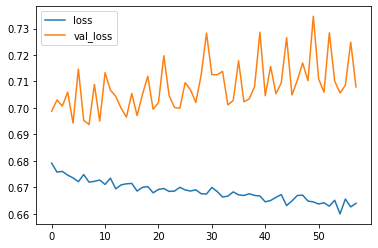

In [401]:
metrics[["loss", "val_loss"]].plot()

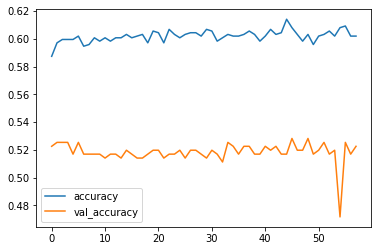

In [402]:
metrics[["accuracy", "val_accuracy"]].plot()

In [403]:
prediction = model.predict_classes(X_test)

### Classificaiton Metrics

In [404]:
from sklearn.metrics import classification_report,confusion_matrix, explained_variance_score

In [405]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.46      0.04      0.07       168
           1       0.52      0.96      0.68       186

    accuracy                           0.52       354
   macro avg       0.49      0.50      0.37       354
weighted avg       0.49      0.52      0.39       354

